# 1) Imports

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import scipy.cluster.hierarchy as shc

warnings.filterwarnings("ignore")

# 2) Coleta dos Dados

In [6]:
df = pd.read_csv(r'../Dados/Tabela_final/tabela_final.csv').drop(columns = 'Unnamed: 0')
df

,IBGE7,UF,NOME,LATITUDE,LONGITUDE,PREC_MED,TEMP_MED,QUAL_MED_AGUA,DIST_CORPO_AGUA,DIST_EF_PUB,...,AREA_IRRIGADA_TOT,AREA_IRRIGADA_POT,AREA_IRRIGADA_POT_E,IDH,T_BANAGUA,T_DENS,T_LIXO,T_LUZ,AGUA_ESGOTO,PAREDE
0,2700300,AL,ARAPIRACA,-9.75487,-36.6615,2.263969,26.327873,62.439167,42.035186,28.233333,...,327.176525,0.000000,0.000000,0.649,82.16,30.83,97.38,99.56,12.38,0.96
1,2700706,AL,BATALHA,-9.67420,-37.1330,1.953488,27.754398,65.300843,24.642419,29.840000,...,0.000000,0.000000,0.000000,0.594,58.61,41.21,88.09,98.93,18.22,5.50
2,2700904,AL,BELO MONTE,-9.82272,-37.2770,1.953488,27.754398,65.300843,3.297594,35.793333,...,0.000000,719.609736,0.000000,0.517,36.42,39.22,99.16,97.68,17.30,12.01
3,2701209,AL,CACIMBINHAS,-9.40121,-36.9911,2.296316,25.157018,65.300843,58.541833,38.426667,...,0.000000,0.000000,0.000000,0.531,18.47,32.14,87.36,98.30,60.86,8.89
4,2701605,AL,CANAPI,-9.11932,-37.5967,1.516842,27.046445,66.893107,68.942666,29.126667,...,0.000000,0.000000,0.000000,0.506,18.20,44.21,93.07,96.97,40.57,2.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2806008,SE,RIBEIRÓPOLIS,-10.53570,-37.4380,0.984831,26.969830,64.911294,1.388835,30.700000,...,0.000000,20.313131,0.000000,0.613,80.88,19.75,98.78,99.49,14.85,3.47
1257,2807006,SE,SÃO MIGUEL DO ALEIXO,-10.38470,-37.3836,1.894041,25.452166,64.911294,16.508752,33.133333,...,0.000000,22.538001,0.000000,0.567,61.09,28.75,95.20,99.04,24.96,10.33
1258,2807105,SE,SIMÃO DIAS,-10.73870,-37.8097,2.499337,24.440877,65.088090,2.685846,32.926667,...,34.223210,80.124605,0.000000,0.604,60.38,24.58,97.96,98.62,30.64,4.38
1259,2807303,SE,TELHA,-10.20640,-36.8818,4.713677,26.562289,64.553680,4.298665,31.706667,...,353.237872,42.721300,0.000000,0.604,89.06,31.18,99.05,99.44,5.01,2.05


# 2) Análise Exploratória

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1261 entries, 0 to 1260
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   IBGE7                1261 non-null   int64  
 1   UF                   1261 non-null   object 
 2   NOME                 1261 non-null   object 
 3   LATITUDE             1261 non-null   float64
 4   LONGITUDE            1261 non-null   float64
 5   PREC_MED             1261 non-null   float64
 6   TEMP_MED             1261 non-null   float64
 7   QUAL_MED_AGUA        1261 non-null   float64
 8   DIST_CORPO_AGUA      1261 non-null   float64
 9   DIST_EF_PUB          1261 non-null   float64
 10  DIST_EM_PUB          1261 non-null   float64
 11  IDEB_AI              1261 non-null   float64
 12  IDEB_AF              1261 non-null   float64
 13  DOCSUP_EF_PUB        1261 non-null   float64
 14  DOCSUP_EM_PUB        1261 non-null   float64
 15  TXNASC7C             1261 non-null   f

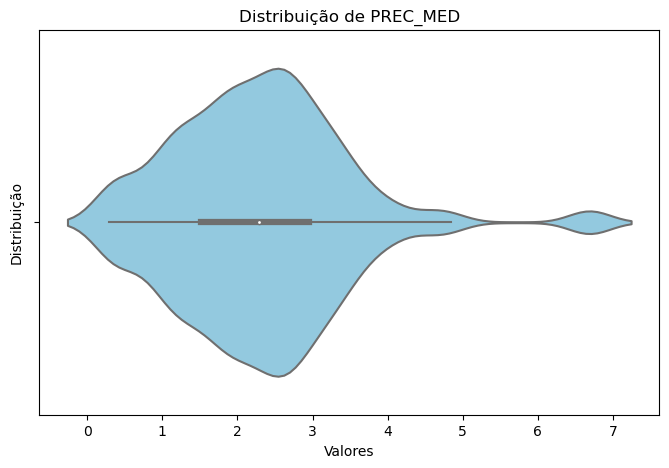

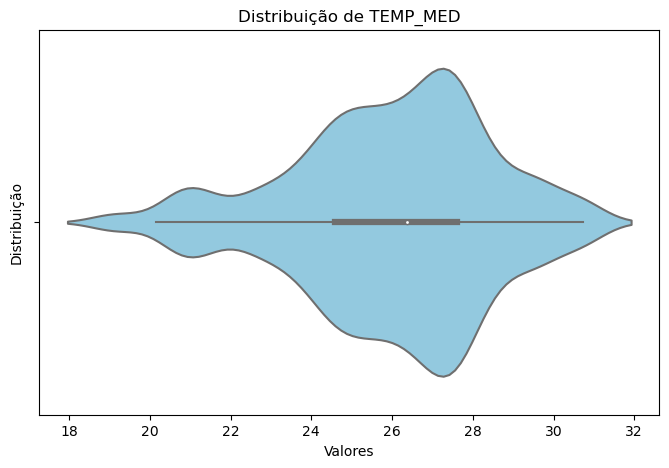

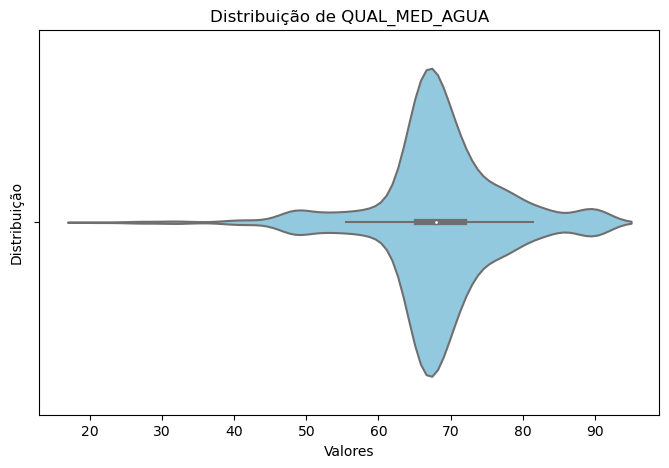

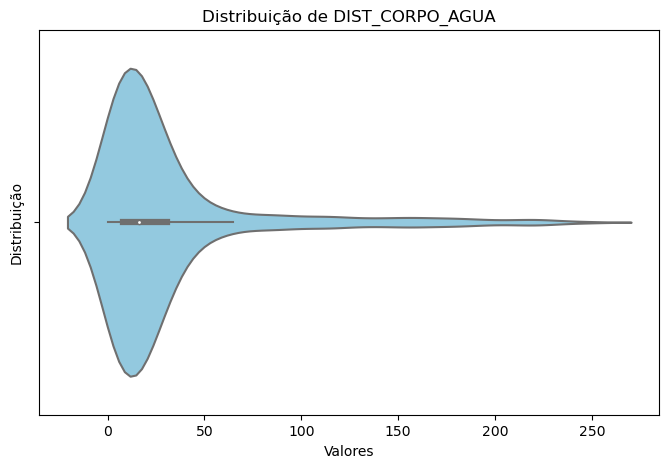

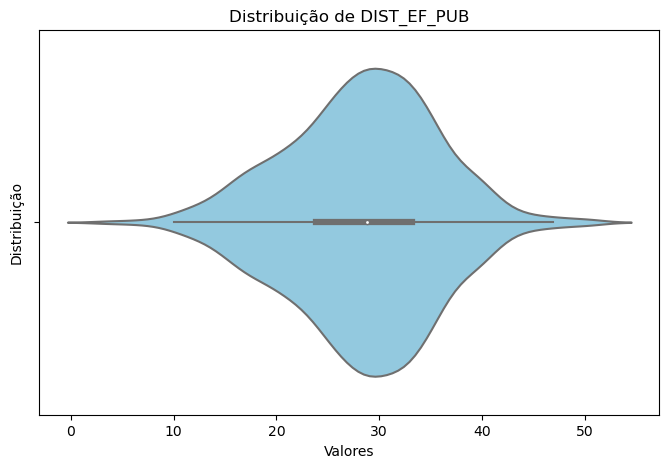

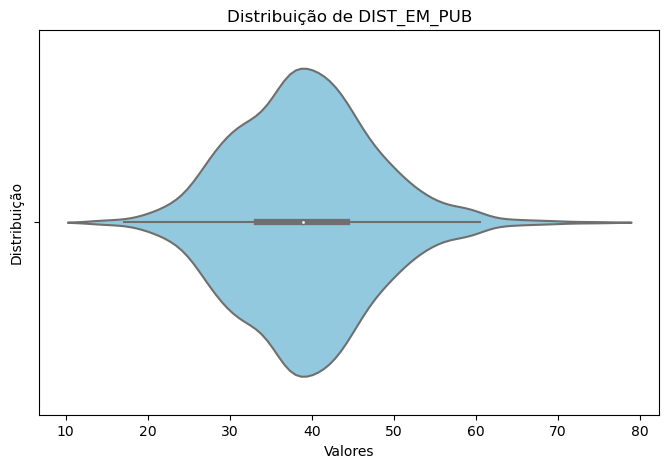

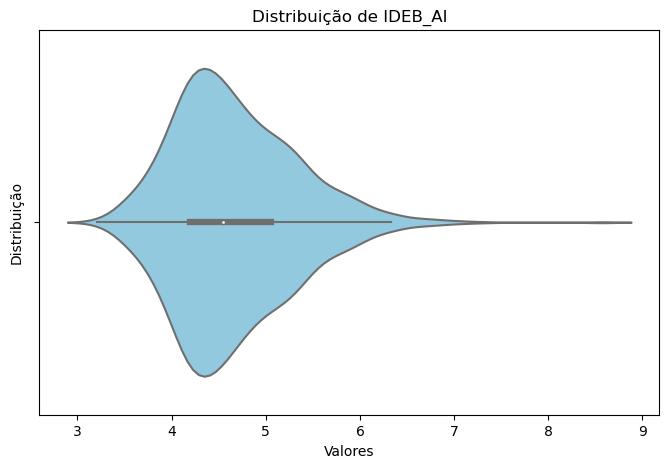

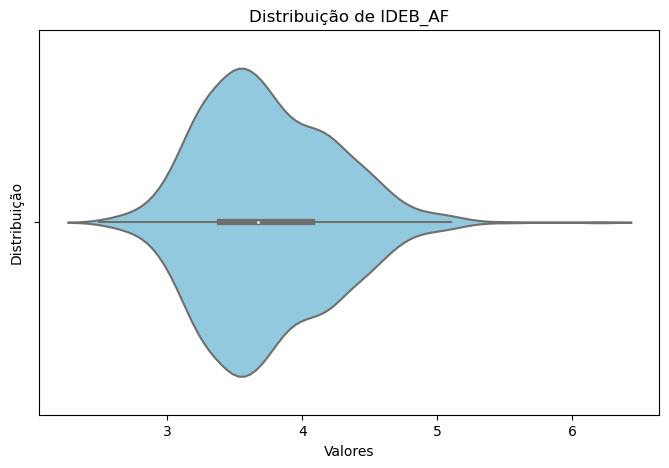

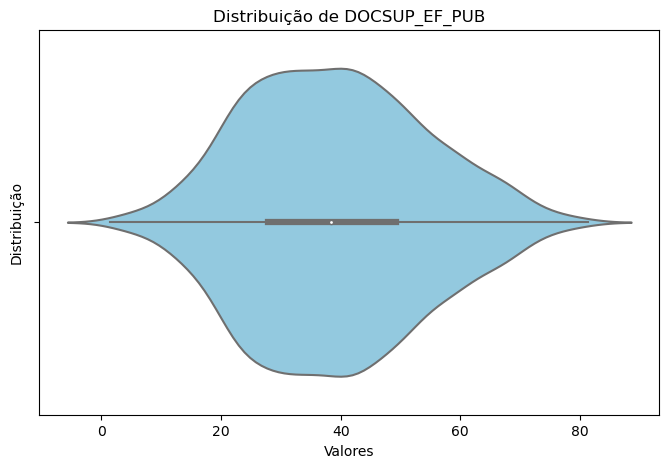

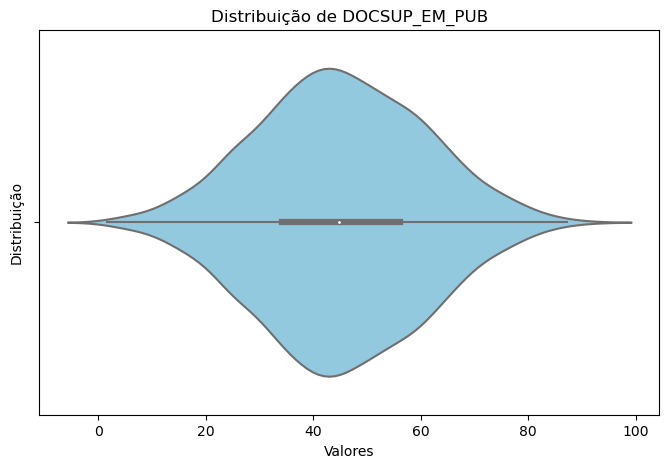

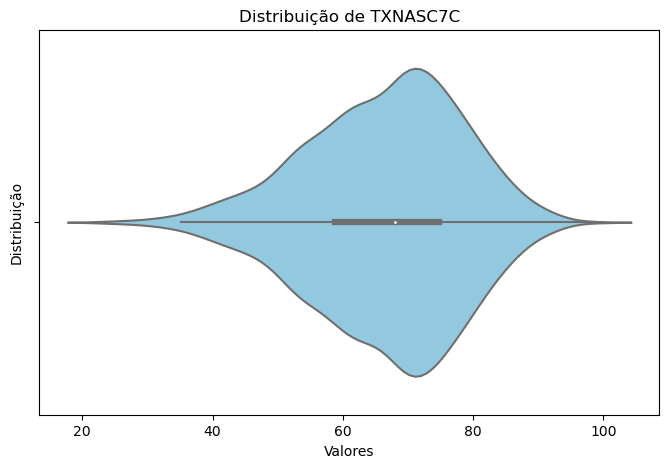

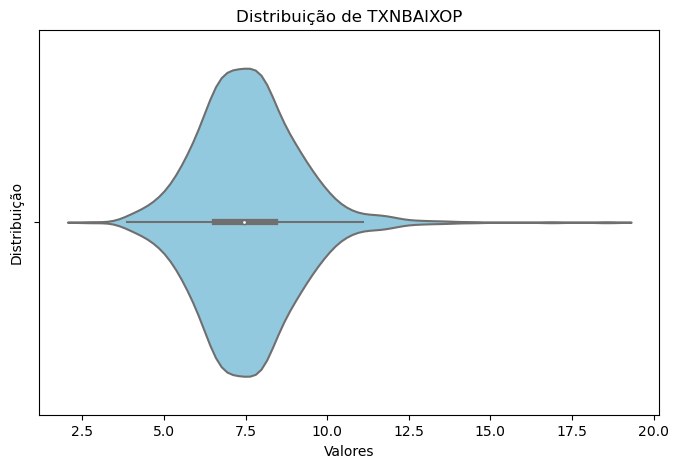

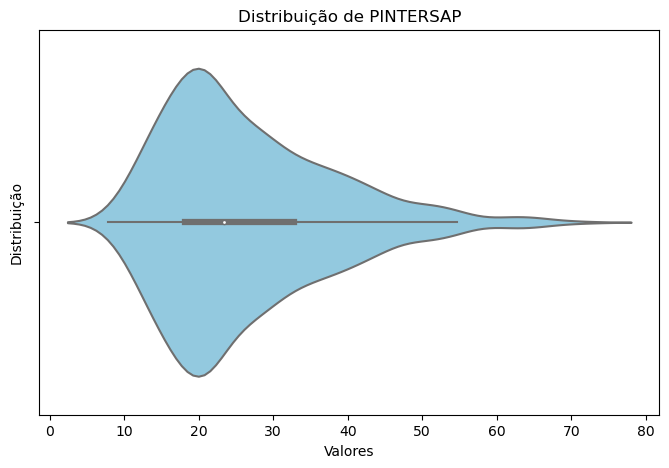

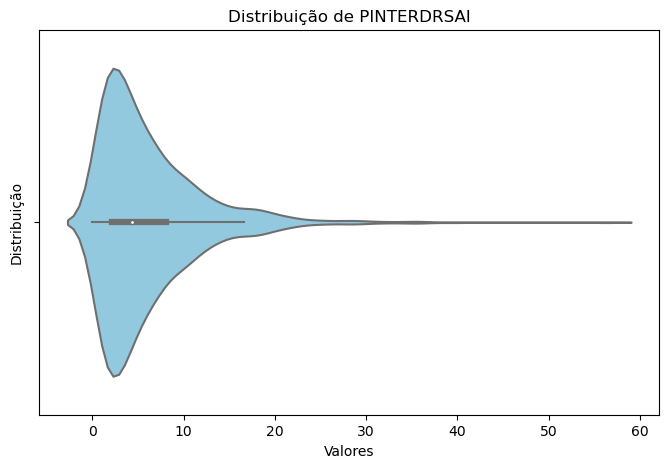

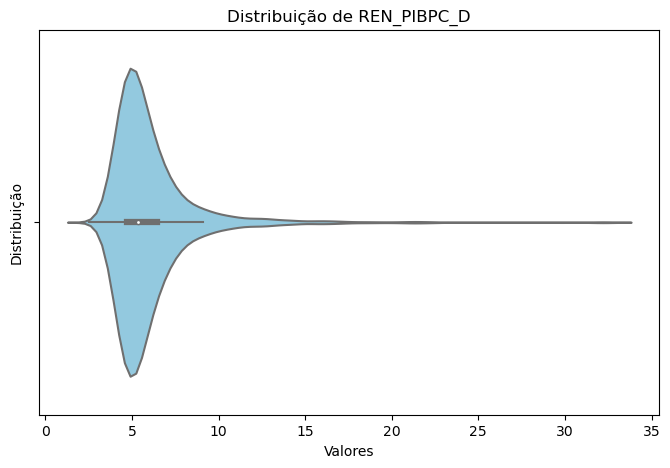

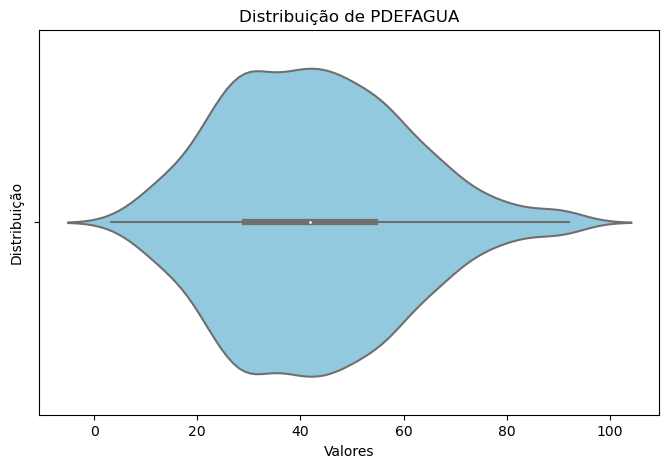

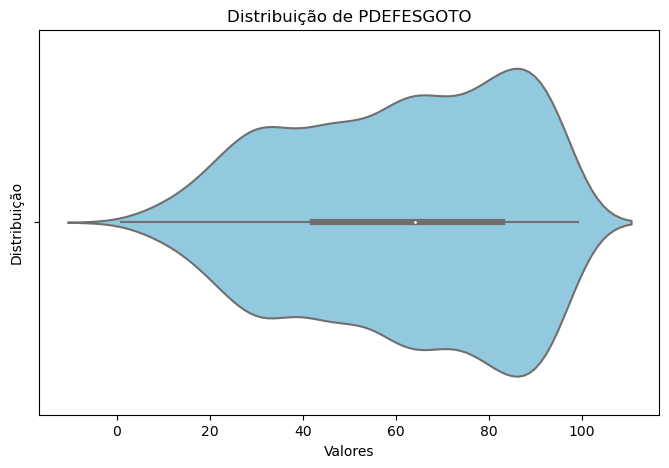

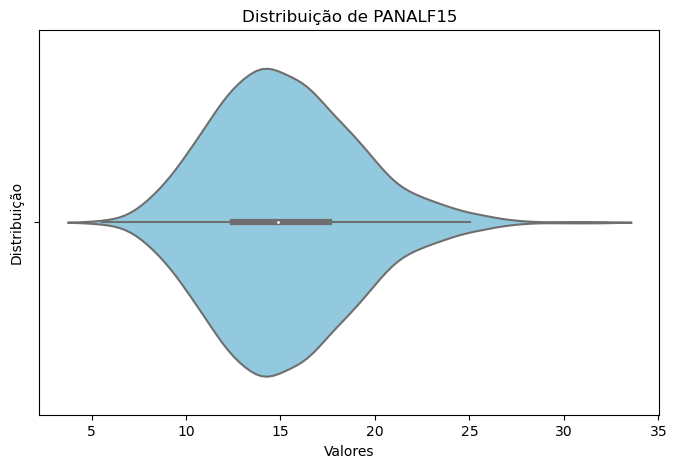

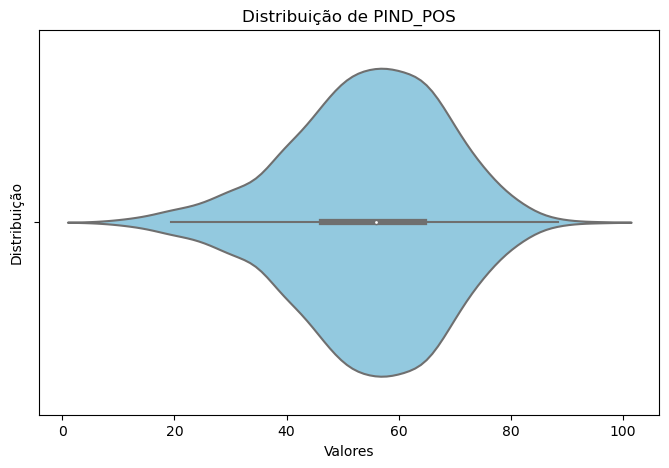

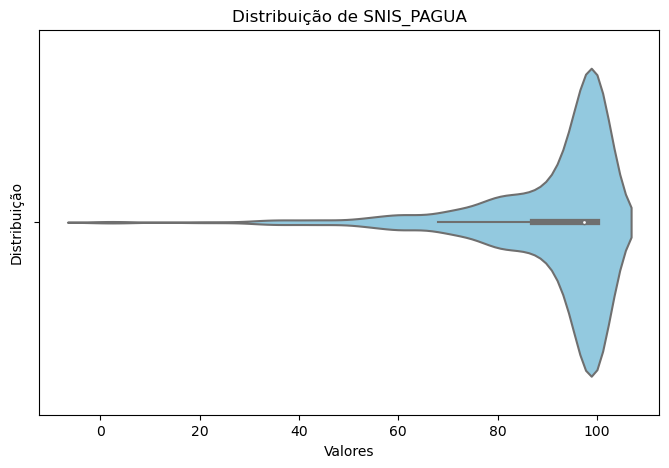

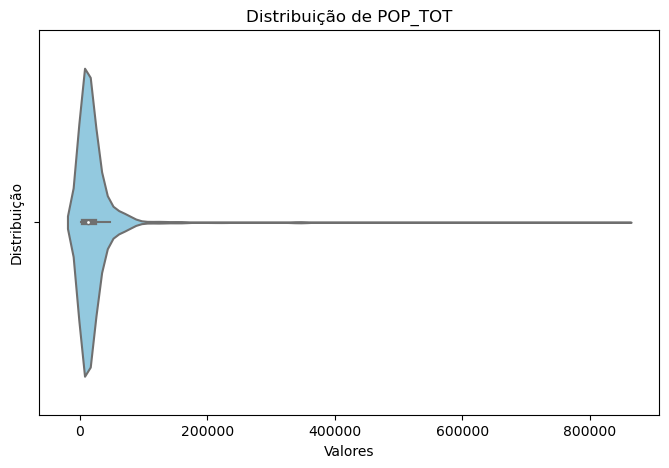

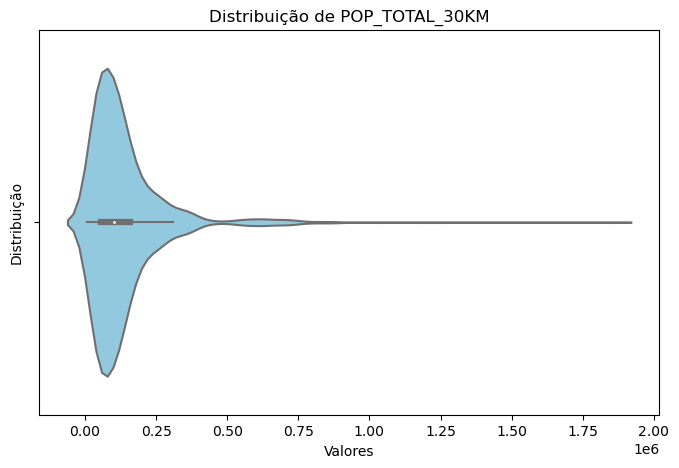

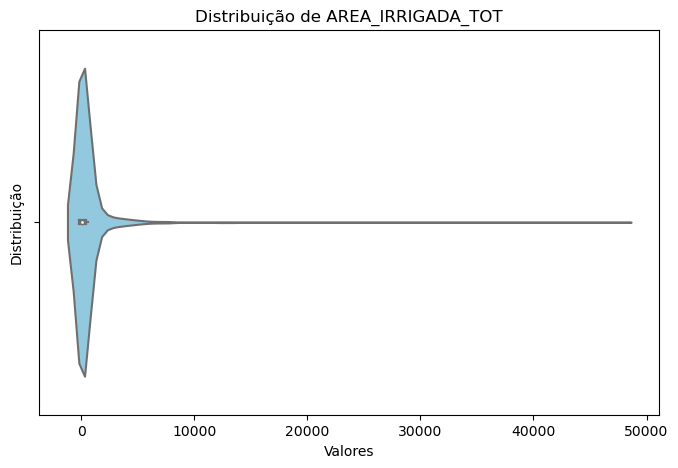

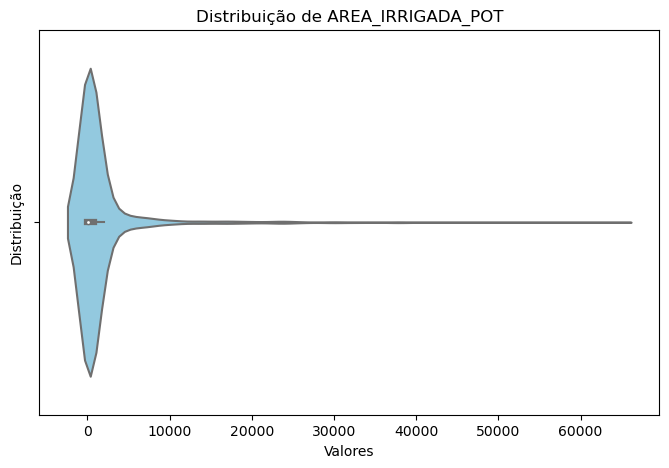

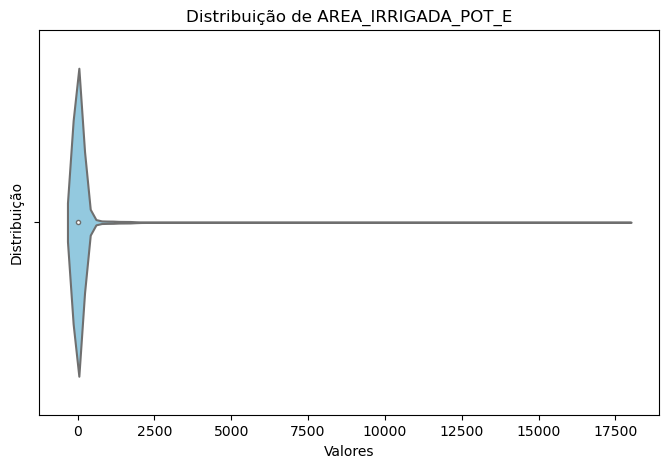

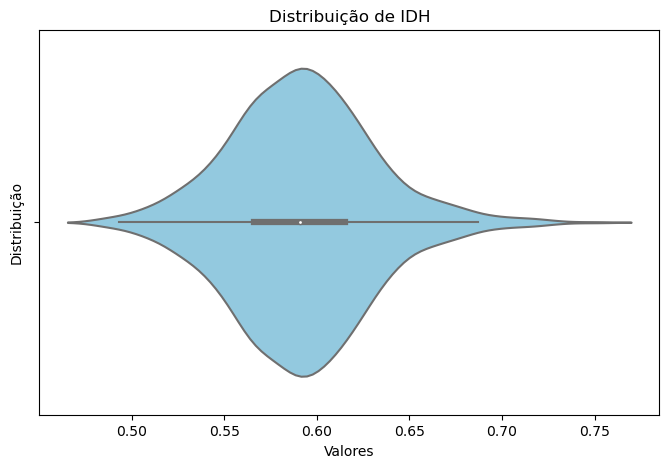

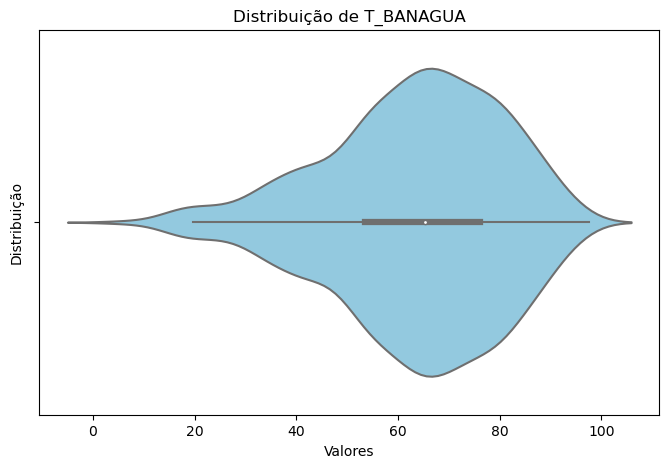

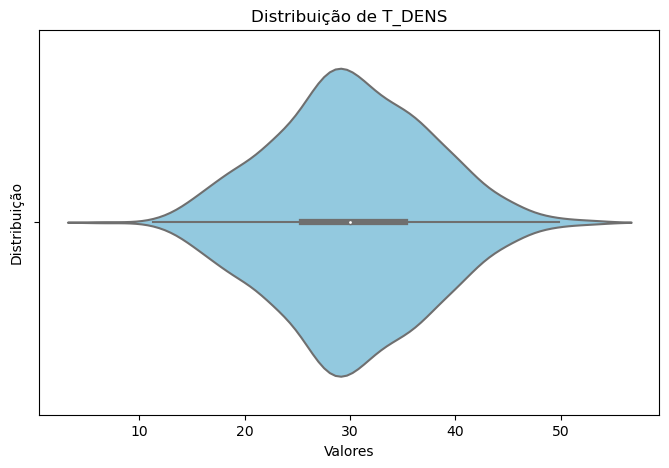

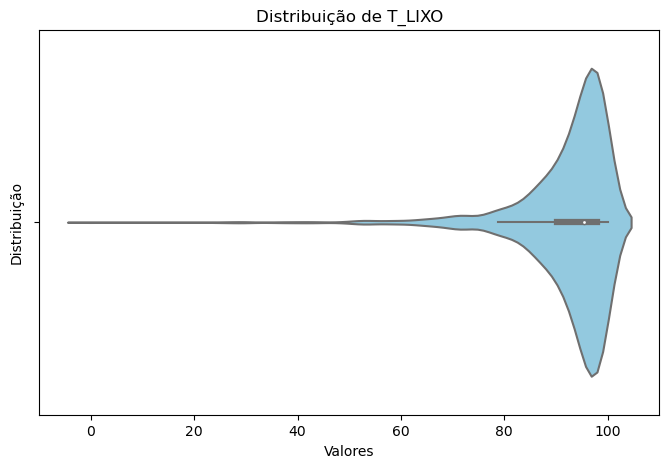

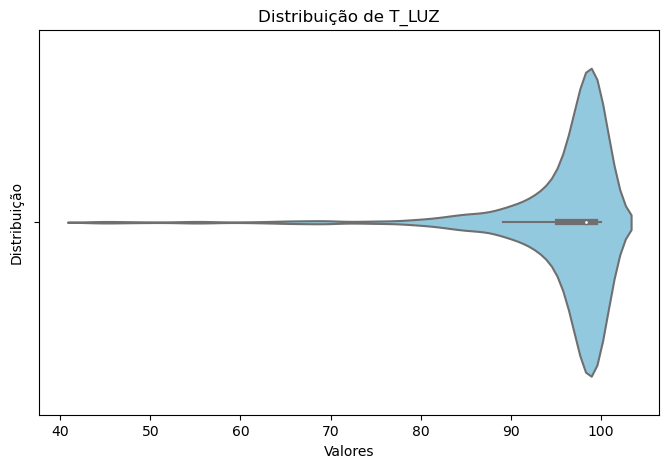

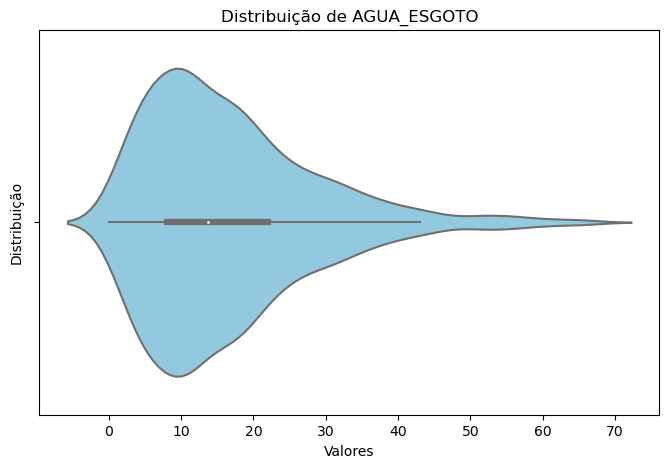

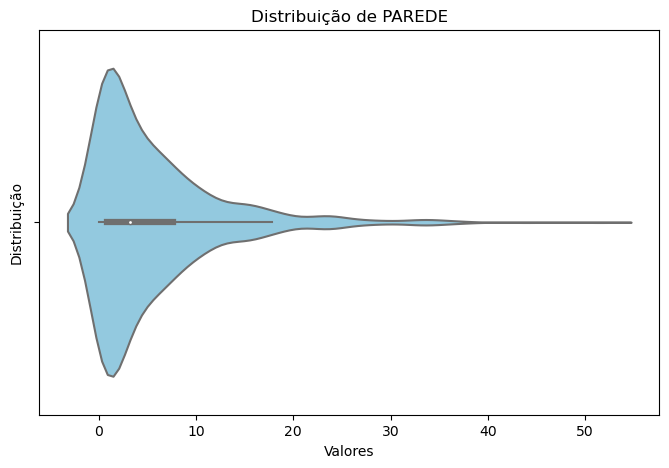

In [19]:
columns = [coluna for coluna in df.columns if (df[coluna].dtype == 'float64')&(coluna not in ['LATITUDE', 'LONGITUDE'])]

for column in columns:
    plt.figure(figsize=(8, 5))  # Ajuste o tamanho da figura conforme necessário
    sns.violinplot(x=df[column], color='skyblue')
        
    # Ajuste o nome dos eixos e o título
    plt.xlabel('Valores')  # Nome do eixo X
    plt.ylabel('Distribuição')  # Nome do eixo Y
    plt.title(f'Distribuição de {column}')  # Título do gráfico
        
    # Exiba o plot
    plt.show()

# 3) Redução da dimensinalidade

## 3.1) Pré-processamento

In [24]:
df_pp = df[columns].copy()
scaler = StandardScaler()
df_pp[columns] = scaler.fit_transform(df_pp[columns])
df_pp

## 3.2) Aplicação do PCA

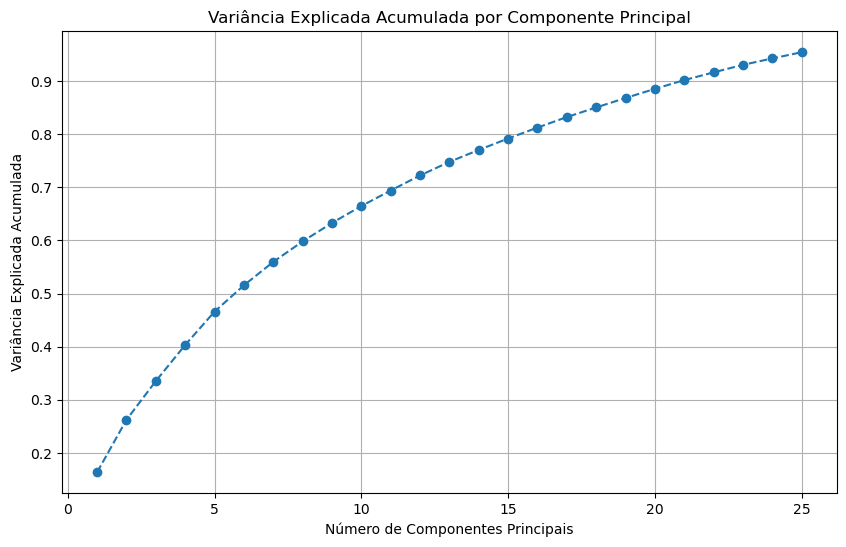

In [28]:
# Aplicar o PCA
pca = PCA(n_components = 0.95)
df_pp = pca.fit_transform(df_pp)

# Calcular a variância explicada para cada componente principal
variancia_explicada = pca.explained_variance_ratio_

# Plotar a variância explicada acumulada
variancia_acumulada = np.cumsum(variancia_explicada)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(variancia_acumulada) + 1), variancia_acumulada, marker='o', linestyle='--')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Explicada Acumulada')
plt.title('Variância Explicada Acumulada por Componente Principal')
plt.grid()
plt.show()

## 3.3) Análise de Cluster

### 3.1.3) Dendogram

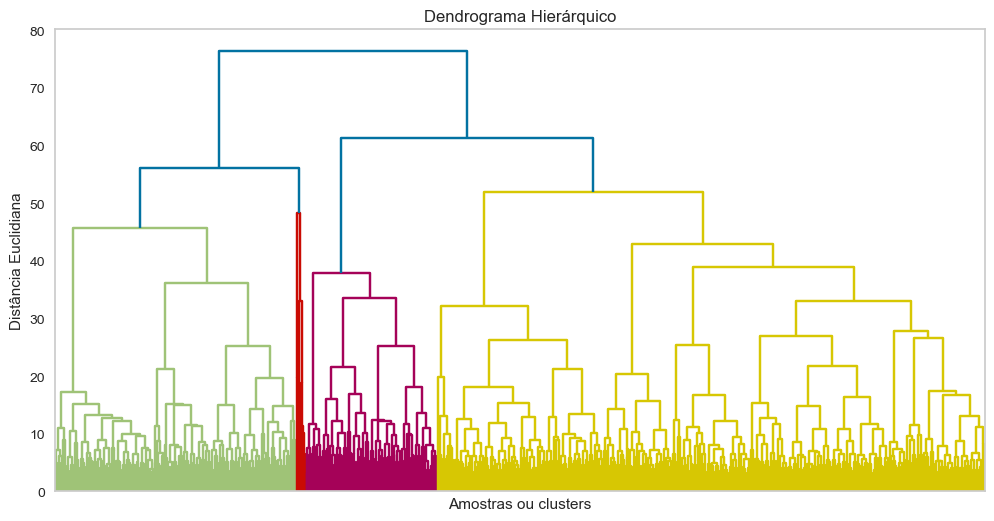

In [47]:
matriz_ligacao = linkage(df_pp, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(matriz_ligacao, p=30, truncate_mode='level')
plt.xticks([])
plt.xlabel('Amostras ou clusters')
plt.ylabel('Distância Euclidiana')
plt.title('Dendrograma Hierárquico')
plt.grid()
plt.show()